In [3]:
def irange(start, stop, step=1):            # This is an inclusive range function, so that I don't have to remember
    if step == 1:                           # that range() leaves out the last value. 
        return range(start, stop+1)         #
    elif step < 0:                          #
        return range(start, stop-1, step)   #
    else:                                   #
        return range(start, stop+1, step)   #

def indeces(somelist):              #returns a list of numbers from 0 to len(somelist), so I can easily iterate with
    return range(len(somelist))     #  reference to the index of each element in the list

def numlen(somenumber):
    return len(str(somenumber))     #returns the number of characters in a number, for formatting purposes

def nicestring(stringinput):
    stringinput=stringinput.lower() #puts the string in all lowercase
    stringinput=stringinput.strip() #removes whitespace from the string
    stringinput=stringinput.translate(None, string.punctuation) #removes all punctuation from the string
    return stringinput

import matplotlib.pyplot as plt          # this is the
                                         # plot library
    
import numpy as np                       # not strictly necessary
                                         # but useful
    
from IPython.display import Latex
    
import scipy, scipy.special, scipy.stats
    
%matplotlib inline                       
                                         # displays plots in the notebook
                                         # instead of popup windows
import math

import random

This is a short script designed to visualize this problem. Feel free to change the values of 'p' and 'q' to see how the data changes. 

We have two primes, $p$ and $q$. We are interested in the sequence $\{a_n\}_{n=1}^{\infty}$ where $a_n=p^\alpha q^\beta$, for various $\alpha, \beta \in \mathbb{Z}$, and all the terms of the sequence are arranged in increasing order. We are specifically interested in the parts of the sequence where an $a_k=p^\alpha$ term is immediately followed by an $a_{k+1}=q^\beta$ term. 

In [4]:
#=============================SETTINGS===========================
p=2          #By convention, we choose p to be the smaller prime
q=3
maxpower=2000
#Maximum value of alpha and beta
#================================================================

a=[]
for i in irange(0,maxpower):        #Evaluates the elements of {a_n}
    for j in irange(0,maxpower):    #
        a.append((i*math.log(p)+j*math.log(q),i,j))   #
a.sort(key=lambda tup: tup[0])      #Sorts {a_n} in increasing order

#print a        #uncomment to debug

In [5]:
orderplot_a=[]                         #Strips out only the values of alpha and beta from the above list, in 
for i in a:                            # preparation for plotting.
    orderplot_a.append((i[1],i[2]))    #
    if i[1]==maxpower or i[2]==maxpower: break
    
#print orderplot_a         #uncomment to debug      

#A Critical Pair is a pair of terms in {a_n} where one is a power of p, and the other is a power of q.
# This part finds all the critical pairs which have been calculated, and adds the to the list 'critical_pairs'.
critical_pairs=[]
for i in indeces(orderplot_a):
    if (orderplot_a[i][0]==0 or orderplot_a[i][1]==0) and not (orderplot_a[i][0]==0 and orderplot_a[i][1]==0):
        if i<>len(orderplot_a)-1:
            if(orderplot_a[i+1][0]==0 or orderplot_a[i+1][1]==0):
                critical_pairs.append((orderplot_a[i],orderplot_a[i+1]))

plotting = 'on'

if plotting == 'on' and maxpower<=25: #If maxpower > 25, the figure is illegible, so it is disabled.
    plt.plot(zip(*orderplot_a)[0],zip(*orderplot_a)[1]);  #
    for i in indeces(critical_pairs): plt.plot(zip(*critical_pairs[i])[0],zip(*critical_pairs[i])[1], color='r');
    plt.grid(which='both')
    plt.xticks(irange(0,maxpower))
    plt.yticks(irange(0,7))
    plt.axis('equal')
    fig=plt.gcf()                                         #Plots the figure. The line connects the powers corres-
    #fig.set_size_inches(5,5)                              #ponding to elements of {a_n} in sequence.   
    ax=fig.add_subplot(111)                               # 
    ax.set_xlabel(str(p)+'^m')                                    #
    ax.set_ylabel(str(q)+'^n');                                   #

#zip(*orderplot_a)        #uncomment to debug

In [ ]:
for i in indeces(critical_pairs):
    print critical_pairs[i]

In [ ]:
for i in indeces(critical_pairs):
    if i==0: print "Critical Pair", "\t|", "pq(n)", "\t"*2, "\t|", "pq(n+2)/pq(n+1)"
    for j in indeces(critical_pairs[i]):
        if critical_pairs[i][j][0] <> 0: print str(p)+"^"+str(critical_pairs[i][j][0]),
        if critical_pairs[i][j][1] <> 0: print str(q)+"^"+str(critical_pairs[i][j][1]),
        #print 2**critical_pairs[i][j][0]*3**critical_pairs[i][j][1],
    print "\t|",
    pqn = str(p**critical_pairs[i][0][0]*q**critical_pairs[i][0][1]*p**critical_pairs[i][1][0]*q**critical_pairs[i][1][1])
    print pqn[:29], " "*(29-len(pqn))+"|",
    if i <(len(critical_pairs)-2):
        ratio = str((p**critical_pairs[i+2][0][0]*q**critical_pairs[i+2][0][1]*p**critical_pairs[i+2][1][0]*q**critical_pairs[i+2][1][1])/(p**critical_pairs[i+1][0][0]*q**critical_pairs[i+1][0][1]*p**critical_pairs[i+1][1][0]*q**critical_pairs[i+1][1][1]))
        print ratio[:29],
    print 

In [8]:
for i in indeces(critical_pairs[:-1]):
    print critical_pairs[i][0][0]+critical_pairs[i][0][1] 
    top=(critical_pairs[i][0][0]+critical_pairs[i][0][1])*(critical_pairs[i][1][0]+critical_pairs[i][1][1])
    bottom=(critical_pairs[i+1][0][0]+critical_pairs[i+1][0][1])*(critical_pairs[i+1][1][0]+critical_pairs[i+1][1][1])
    print top/bottom

1
0
1
0
3
0
3
0
5
0
7
0
9
0
11
0
13
0
15
0
17
0
19
0
21
0
23
0
25
0
27
0
29
0
31
0
33
0
35
0
37
0
39
0
41
0
43
0
45
0
47
0
49
0
51
0
53
0
55
0
57
0
59
0
61
0
63
0
65
0
67
0
69
0
71
0
73
0
75
0
77
0
79
0
81
0
83
0
85
0
87
0
89
0
91
0
93
0
95
0
97
0
99
0
101
0
103
0
105
0
107
0
109
0
111
0
113
0
115
0
117
0
119
0
121
0
123
0
125
0
127
0
129
0
131
0


In [9]:
print len(critical_pairs)

69


In [10]:
math.log(5)/math.log(3)

1.4649735207179269

In [11]:
print orderplot_a[:5]
print len(orderplot_a[:5])

[(0, 0), (1, 0), (0, 1), (2, 0), (1, 1)]
5


In [7]:
#Observe how the slopes between the two points of a critical pair seem to approach a limit; namely ln(p)/ln(q).
critical_slopes=[]

plot_slopes='critical' #options: 'critical' or 'all

if plot_slopes=='critical':
    for i in critical_pairs:
        slope=float(i[0][1]-i[1][1])/(i[0][0]-i[1][0])
        critical_slopes.append(slope)

if plot_slopes=='all':
    for i in indeces(orderplot_a):
        slope=float(orderplot_a[i][1]-orderplot_a[i+1][1])/(orderplot_a[i][0]-orderplot_a[i+1][0])
        critical_slopes.append(slope)
        if i == len(orderplot_a)-2: break

limit=-math.log(p)/math.log(q)

print limit
print    
print critical_slopes

-0.630929753571

[-1.0, -0.5, -0.6666666666666666, -0.6, -0.625, -0.6363636363636364, -0.631578947368421, -0.6296296296296297, -0.6304347826086957, -0.6307692307692307, -0.6309523809523809, -0.6308724832214765, -0.630901287553648, -0.6309148264984227, -0.6309226932668329, -0.6309278350515464, -0.6309314586994728, -0.6309297912713473, -0.6309291747888239]


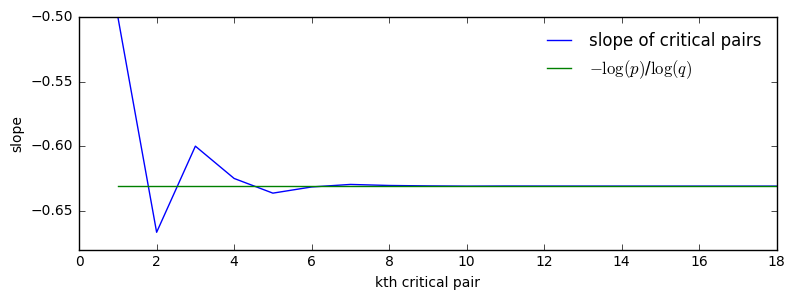

In [8]:
first=1    #Default = 0
last=None  #Default = None

plt.plot(indeces(critical_slopes)[first:last],critical_slopes[first:last], label='slope of critical pairs');
plt.plot(indeces(critical_slopes)[first:last],[limit]*len(critical_slopes[first:last]), label='$-\log(p)$/$\log(q)$');
plt.legend(loc="upper right",frameon=False)
fig=plt.gcf()
fig.set_size_inches(9,3)
ax=fig.add_subplot(111)                               # 
ax.set_xlabel('kth critical pair')
ax.set_ylabel('slope');

In [14]:
residuals=[]
for i in critical_slopes:
    residuals.append(i - limit)
print residuals
    
abs_residuals=[0]*len(residuals)
for i in indeces(residuals): abs_residuals[i]=residuals[i]
for i in indeces(residuals):
    if residuals[i]<=0:
        abs_residuals[i]*=-1
        
#print; print abs_residuals         #Uncomment to debug

[-0.33380492832994135, 0.16619507167005865, -0.00047159499660798243, 0.06619507167005867, 0.04119507167005865, 0.029831435306422294, 0.023337928812915743, 0.01913624814064685, 0.016195071670058625, 0.014021158626580377, 0.012348917823904793, 0.011022657876955222, 0.009945071670058647, 0.009052214527201508, 0.008300334827953337, 0.007658486304204959, 0.007104162579149587, 0.0066206035849523115, 0.006195071670058616, 0.005817713179492645, 0.005480785955772949, 0.005178122517516259, 0.004904749089413518, 0.0046566101315971276, 0.004430365787705726, 0.004223240684143148, 0.004032909507896476, 0.003857409332396311, 0.0036950716700586694, 0.003544469260420069, 0.0034043739956400865, 0.003273723355451952, 0.003151593409189135, 0.00303717693321659, 0.0029297655476097084, 0.002828735036395247, 0.0027335332085202113, 0.002643669800899806, 0.0025587080336949564, 0.0024782575107665794, 0.0024019682217827354, 0.0023295254515712793, 0.0022606454405504905, 0.0021950716700586126, 0.0021325716700586472

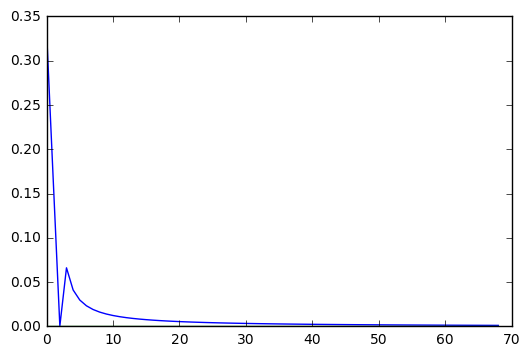

In [20]:
first=0                 #Default = 0
last=None               #Default = None
absolute_value='True'   

if absolute_value == 'False':
    plt.plot(indeces(residuals)[first:last],residuals[first:last]);
if absolute_value == 'True':
    plt.plot(indeces(abs_residuals)[first:last],abs_residuals[first:last]);

plt.plot(indeces(residuals)[first:last],[0]*len(residuals[first:last]));

#In this figure, I was hoping that perhaps the slope of each critical pair is always closer to the limit, but 
# that isn't the case. Here is a plot of the residuals, with an option set to plot in absolute value.

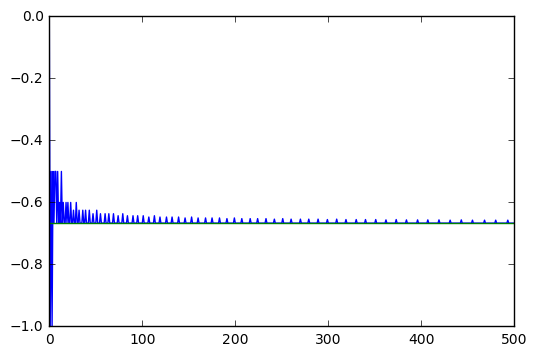

In [16]:
#This tool charts the slopes of every pair of points in the sequence. note that there is less structure
# here than in the critical slopes figure above, however these slopes also seem to approach the limit. 

all_slopes=[]
for i in indeces(orderplot_a[:500]):
    slope=float(orderplot_a[i][1]-orderplot_a[i+1][1])/(orderplot_a[i][0]-orderplot_a[i+1][0])
    all_slopes.append(slope)
    if i == len(orderplot_a)-2: break

#print all_slopes         #uncomment to debug         
    
plt.plot(indeces(all_slopes),all_slopes);
plt.plot(indeces(all_slopes),[limit]*len(all_slopes));